In [1]:
import numpy as np

# Valuing a two-period European call
**Problem:** Suppose the current price of Ringeriksnett is NOK 50 per share. In each of the next two years, the stock price will either increase by 20% or decrease by 10%. The 3% one-year risk-free rate of interest will remain constant. Calculate the price of a two-year European call option on Ringeriksnett with strike price NOK 60.

In [28]:
S0 = 50 # Initial stock price 
K = 60 # Strike price
u = 1.2 # up factor
d = 0.9 # down factor 
T = 2 # number of time steps
r = 0.03 # risk-free rate of interest

# Create a 2D numpy array to store the 3 levels: t0 t1 t2
tree = np.zeros((T + 1, T + 1))
tree

# Populate the tree with asset prices
for t in range(T + 1):
    for i in range(t + 1):
        tree[i, t] = S0 * (u ** (t - i)) * (d ** i)

# Compute put option values at maturity
call_values = np.maximum(0,tree[:, T] - K )

# Display results
print("Binomial Tree:\n", tree)
print("\n Call Option Values at Maturity:\n", call_values)

Binomial Tree:
 [[50.  60.  72. ]
 [ 0.  45.  54. ]
 [ 0.   0.  40.5]]

 Call Option Values at Maturity:
 [12.  0.  0.]


## Looking at the equations for the binomial model.
A good way to see where these numbers come from is to remember that in the binomial model you solve for the replicating portfolio ($\Delta, B$) by forcing the portfolio to have exactly the same payoff as the option in both the up and down states.

1. **Set up the two equations:** At the "60" node, the stock can go up to 72 (in which case the option is worth 12) or down to 54 (in which case the option is worth 0). We want to hold $\Delta$ shares of the stock and $B$ in the risk-free asset so that:

$$
1.03B + 72\Delta = 12 
$$

$$
1.03B + 54\Delta = 0
$$

* The first equation says that if the stock ends at 72, then $\Delta$ shares plus interest on $B$ must match the option payoff of 12.
* The second equation says that if the stock ends at 54, then $\Delta$ shares plus interest on $B$ must match the option payoff of 0.

2. **Subtract the second equation from the first to find $\Delta$**:

$$
(1.03B + 72\Delta) - (1.03B+52\Delta)=12-0
$$

$$
1.03B + 72\Delta - 1.03B - 52\Delta = 12-0
$$

$$
18\Delta=12\Rightarrow\Delta=\frac{12}{18}\Rightarrow\Delta=\frac{2}{3}
$$

3. **Substitute \Delta=2/3 back to solve for $B$**: Pick either equation (usually the simpler one). From the second equation,

$$
1.03B + 54\cdot\frac{2}{3}=0\Rightarrow 1.03B + 36 = 0 \Rightarrow B = -\frac{36}{1.03}=-34.95
$$

The value of the option at "node 60" is:

$$
-34.95 + 2/3 \cdot 60 = 5.0485
$$

Now looking at node 60 and 45, we have the equations
$$
1.03B + 60\Delta = 5.0485
$$

$$
1.03B + 45\Delta = 0
$$

We will then subtract the second equation from the first to find the $\Delta$:
$$
(1.03B + 60\Delta)-(1.03B + 45\Delta) = 5.0485 - 0
$$

$$
60\Delta - 45\Delta = 5.0485 \Rightarrow 15\Delta=5.0485 \Rightarrow \Delta = \frac{5.0485}{15}=0.3365
$$

The value of the bond would then be:

$$
1.03B + 45\cdot 0.3365 = 0 \Rightarrow B = -\frac{45\cdot0.3365}{1.03}=-15.1456
$$

The value of the option is:

$$
B+\Delta \cdot 50 = -15.1456 + 0.3365 \cdot 50 = 1.67
$$

## Here are the same calculations in Excel

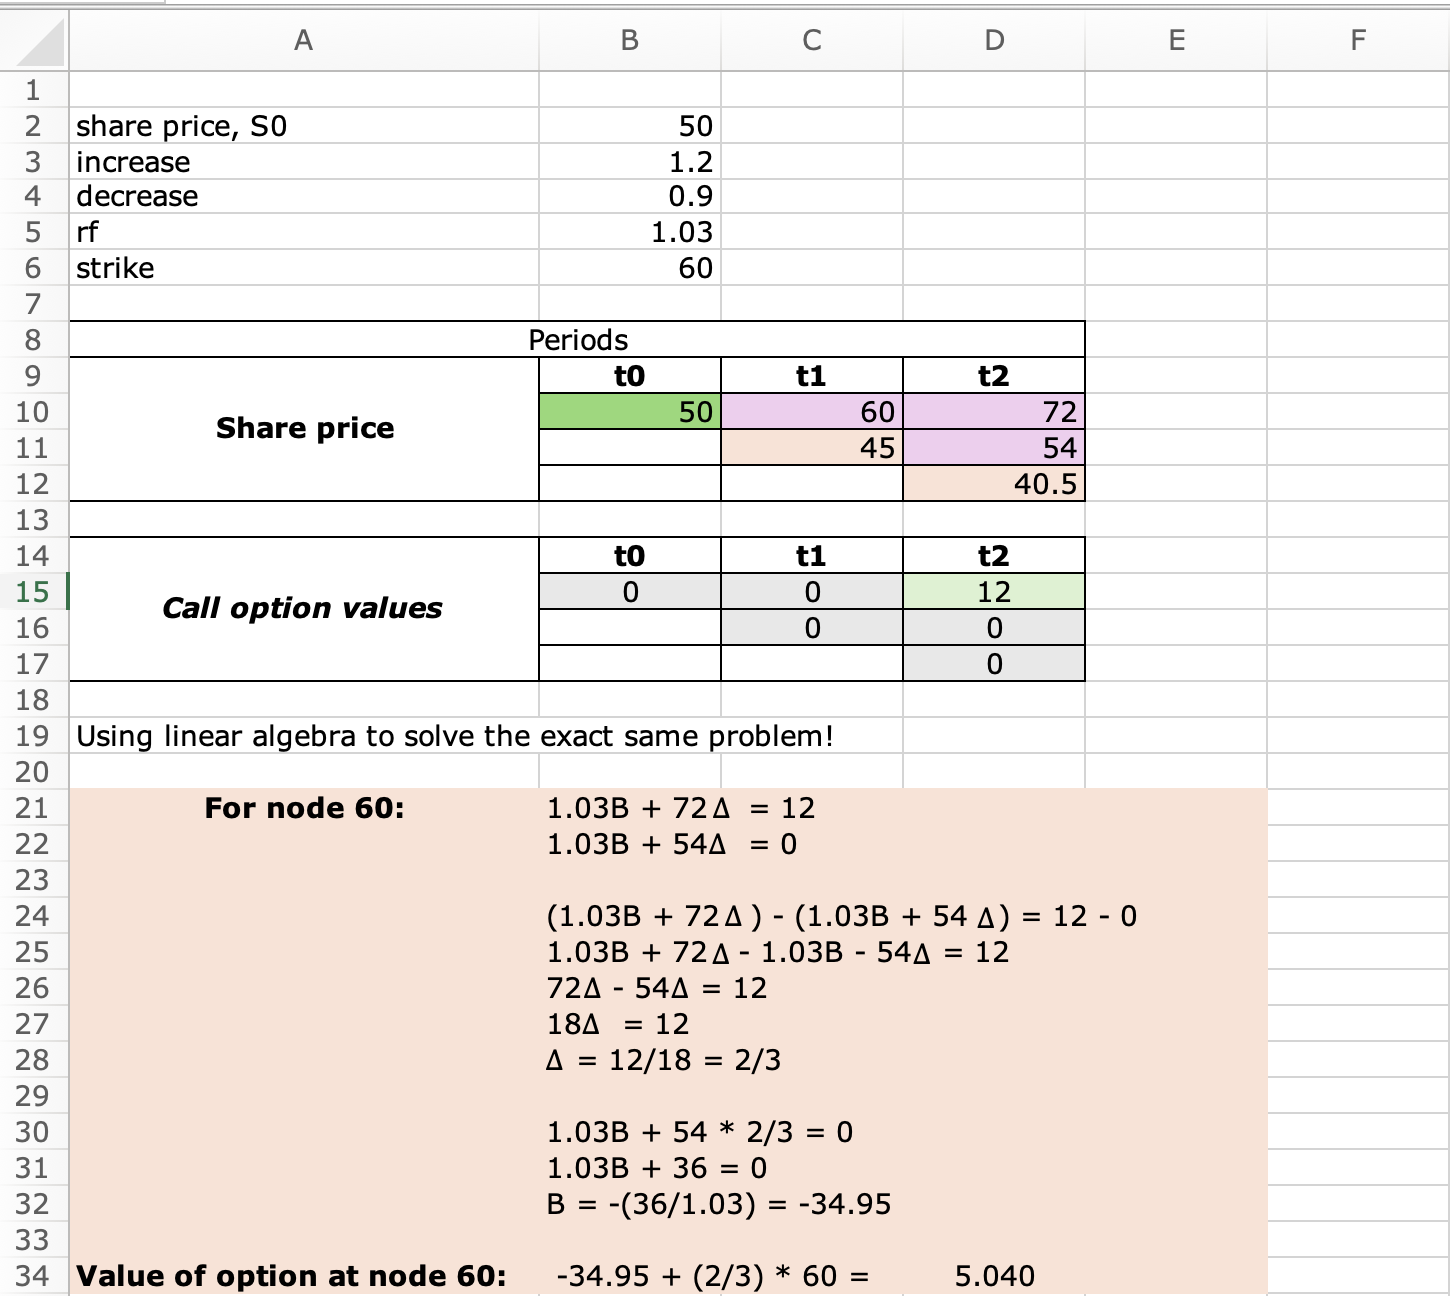

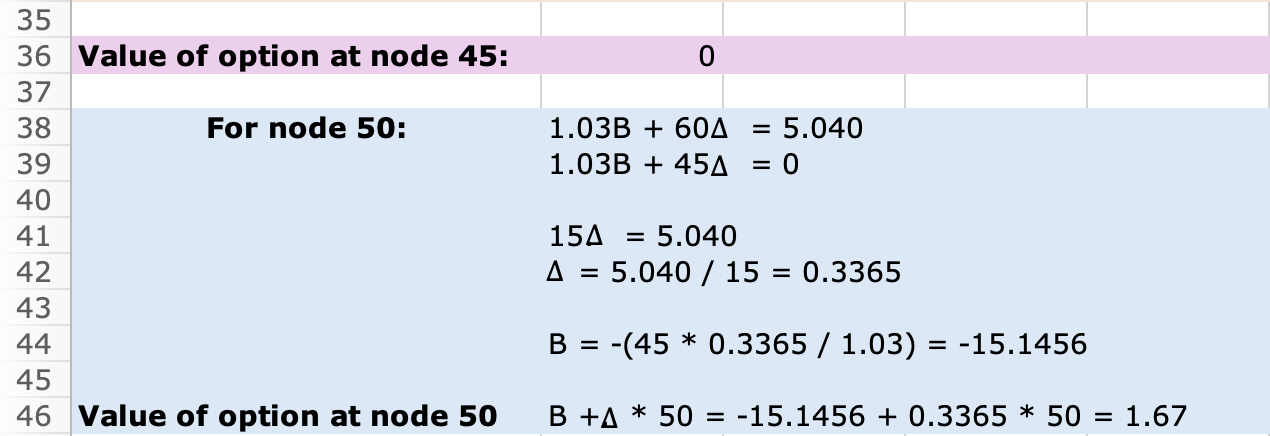

# Binomial model for currency options
**Problem:**
* $S_0=100NOK/100DKK$, $r_N=5\%$ p:p, $r_D=3.9604\%$
* $S_1$ is either $S_{1;u}=110$ ("up") or $S_{1,d}=95$ ("down").
* What is the value of 1-period European-style call with strike $X=105$

## The Equation for the "up" state or $S_{1;u}$
$$
x\space DKK \cdot 1.10\frac{NOK}{DKK} \cdot 1.039604 + y\space NOK \cdot 1.05 = 0.05\space NOK
$$

1. $x\space DKK$ - The replicating portfolio holds $x$ Danish kroner at time 0.

2. $\cdot 1.10\frac{NOK}{DKK}$ - In the **up state**, the exchange rate is 1.10 NOK per 1 DKK, so your convert into NOK at that rate.

3. $\cdot 1.039604$ - While your $x$ DKK were invested, they **accrued interest at the Danish risk-free rate**, $r_D=3.9604\%$. Over one period, 1 DKK grows to 1.039604 DKK. (The product is commutative, so you sometimes see the 1.039604 before the 1.10 factor. The idea is just: "DKK first grows by 3.9604%, then gets converted to NOK at 1.10")


4. $+y\space NOK\cdot 1.05$ - The replicating portfolio also holds $y$ Norwegian kroner. Those NOK **accrue interest at the Norwegian risk-free rate,** $r_N=5\%$, so 1 NOK grows to 1.05 NOK over one period. Hence $y\space NOK$ becomes $y\times1.05\space NOK$.

5. $=0.05\space NOK$ - In the up state, the call-option payoff is 0.05 NOK. We want our combination of DKK-investment converted-to-NOK plus NOK-investment to replicate (match) that 0.05 NOK payoff exactly

## The Equation for the "down" state $S_{1;d}$
$$
x\space DKK \cdot 0.95\frac{NOK}{DKK}\cdot 1.039604 + y\space NOK\cdot 1.05 = 0 NOK
$$

1. $x\space DKK$ - The same $x$ units of DKK as above are still held in the replicating portfolio

2. $\cdot\space 0.95\frac{NOK}{DKK}$ - In the down state, 1DKK = 0.95 NOK

3. $\cdot 1.039605$ - Again, those $x$ DKK earn Danish interest at 3.9604%, so 1 DKK becomes 1.039604 DKK before you convert it into NOK.

4. $+y\space NOK\cdot 1.05$ - The $y$ NOK portion still earns 5% and ends up as $y\times 1.05$ NOK.

5. $= 0\space NOK$ - In the down state, the call payoff is 0 NOK (because the option finishes out-of-the-money). Our portfolio combination has to replicate that 0 NOK payoff by summing exactly to zero.

### Solving for the number of DKK ($x$) in the replicating portfolio
$$
(1)\space\space\space\space x\cdot1.10\cdot1.039604+y\cdot1.05=0.05
$$

$$
(2)\space\space\space\space x\cdot0.95\cdot1.039604+y\cdot1.05=0
$$

For cleariy, I have omitted the DKK/NOK units in the multipliers but the structure is the same.

Subtract equation (2) from (1):
$$
[x\cdot1.10\cdot1.039604+y\cdot1.05] - [x\cdot 0.95\cdot 1.039604 + y \cdot 1.05] = 0.05 - 0
$$

Observe that the $y\cdot 1.05$ terms cancel out, leaving only terms with $x$.

$y$ is gone because $y\cdot 1.05 - y\cdot 1.05 = 0$. Combine $x$ and the common factor 1.039604, and lastly, the difference $1.10-0.95=0.15$. This means that we have:

$$
x\cdot1.039604\times0.15=0.05
$$

Divide both sides by $[1.039604\times0.15]:$
$$
x=\frac{0.05}{1.039604\times0.15}\approx0.3206349\space DKK
$$

In [38]:
# This is what it looks like in python
x = 0.05 / (1.039604 * 0.15)
print(f"x = {x} DKK")

x = 0.3206349084202575 DKK


### Solving for the number of NOK ($y$) in the replicating portfolio
We have the original (2) formula: $x\cdot 0.095\cdot 1.039604+y\cdot1.05 = 0$

Now that we have solved for $x$, we have: $0.3206349\cdot 0.95\cdot 1.039604+y\cdot1.05=0$

Let's do some python calculation for solving $y$

In [34]:
# we don't need to compute for y * 1.05 because that is just = 1.05y
prod_1 = 0.3206349 * 0.95 * 1.039604
prod_1

0.31666665835061997

Now the equation changes to: $0.31666665835061997 + 1.05y = 0$

We continue on: $1.05y = -0.31666665835061997$

Lastly we then have: $y=-\frac{0.31666665835061997}{1.05}$

In [39]:
y = -(0.31666665835061997 / 1.05)
print(f"y = {y} NOK")

y = -0.3015872936672571 NOK


Then we have the answer: $y = -0.3015872936672571$ NOK

Cost of the replicating portfolio today, i.e., the price of the call option today:

$$
0.3206349084202575\space DKK\cdot 1.00 NOK/DKK -0.3015872936672571\space NOK = 0.01904\space NOK
$$

In [49]:
# cost of replicating portfolio or price of the call option - python
price = x * 1 + y
print(f"price of the call option: {price} NOK")

price of the call option: 0.019047614753000375 NOK


Now what does the number 0.019047614753000375 NOK mean? It means that if you want to replicate the call's payoff - so that you receive exactly the same cash flow it delivers in either the up or down scenario - you would need to set up (and pay for) a portfolio consisting of $x$ DKK and $y$ NOK whose net time-0 cost is 0.01904 NOK. Hence, **the "price of the call"** is 0.01904 NOK: if you paid that amount up front and followed the replication strategy (investing a bit in DKK and shorting some NOK), you would end up with the same terminal payoff the call provides. That's why 0.01904 NOK is the fair or no-arbitrage value of the option.

Also, we could also check if the $x$ and $y$ value is correct by putting into the equation and expectating the answer of 0.05 and 0 NOK respectively.

In [51]:
eq1 = x * 1.10 * 1.039604 + y * 1.05
eq2 = x * 0.95 * 1.039604 + y * 1.05

print(f"eq1: {eq1}")
print(f"eq2: {eq2}")

eq1: 0.05000000831604673
eq2: 8.316046740119987e-09


Eq2's value is so tiny (on the order of $10^{-9}$) that it indicates the result is effectively zero but is being displayed as a very small number due to floating-point rounding in the computer. In theory, from the algebraic equation, $eq2$ is exactly zero. However, because floating-point arithmetic cannot always represent real-numbers calculations exactly, you see a tiny residual such as 8.316 e-9 instead of a perfect zero.